In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D,MaxPooling2D
from tensorflow.keras import regularizers,optimizers
from tensorflow.keras.utils import to_categorical
from sklearn .metrics import accuracy_score

In [45]:
from keras.preprocessing.image import ImageDataGenerator

In [49]:
train_data_path = '/content/drive/MyDrive/CNN_Data/Face Recognition/train'
test_data_path = '/content/drive/MyDrive/CNN_Data/Face Recognition/test'

In [89]:
# Create image data generators
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(train_data_path, target_size=(64, 64), batch_size=32,  color_mode='grayscale')
test_generator = datagen.flow_from_directory(test_data_path, target_size=(64, 64), batch_size=32,  color_mode='grayscale')

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


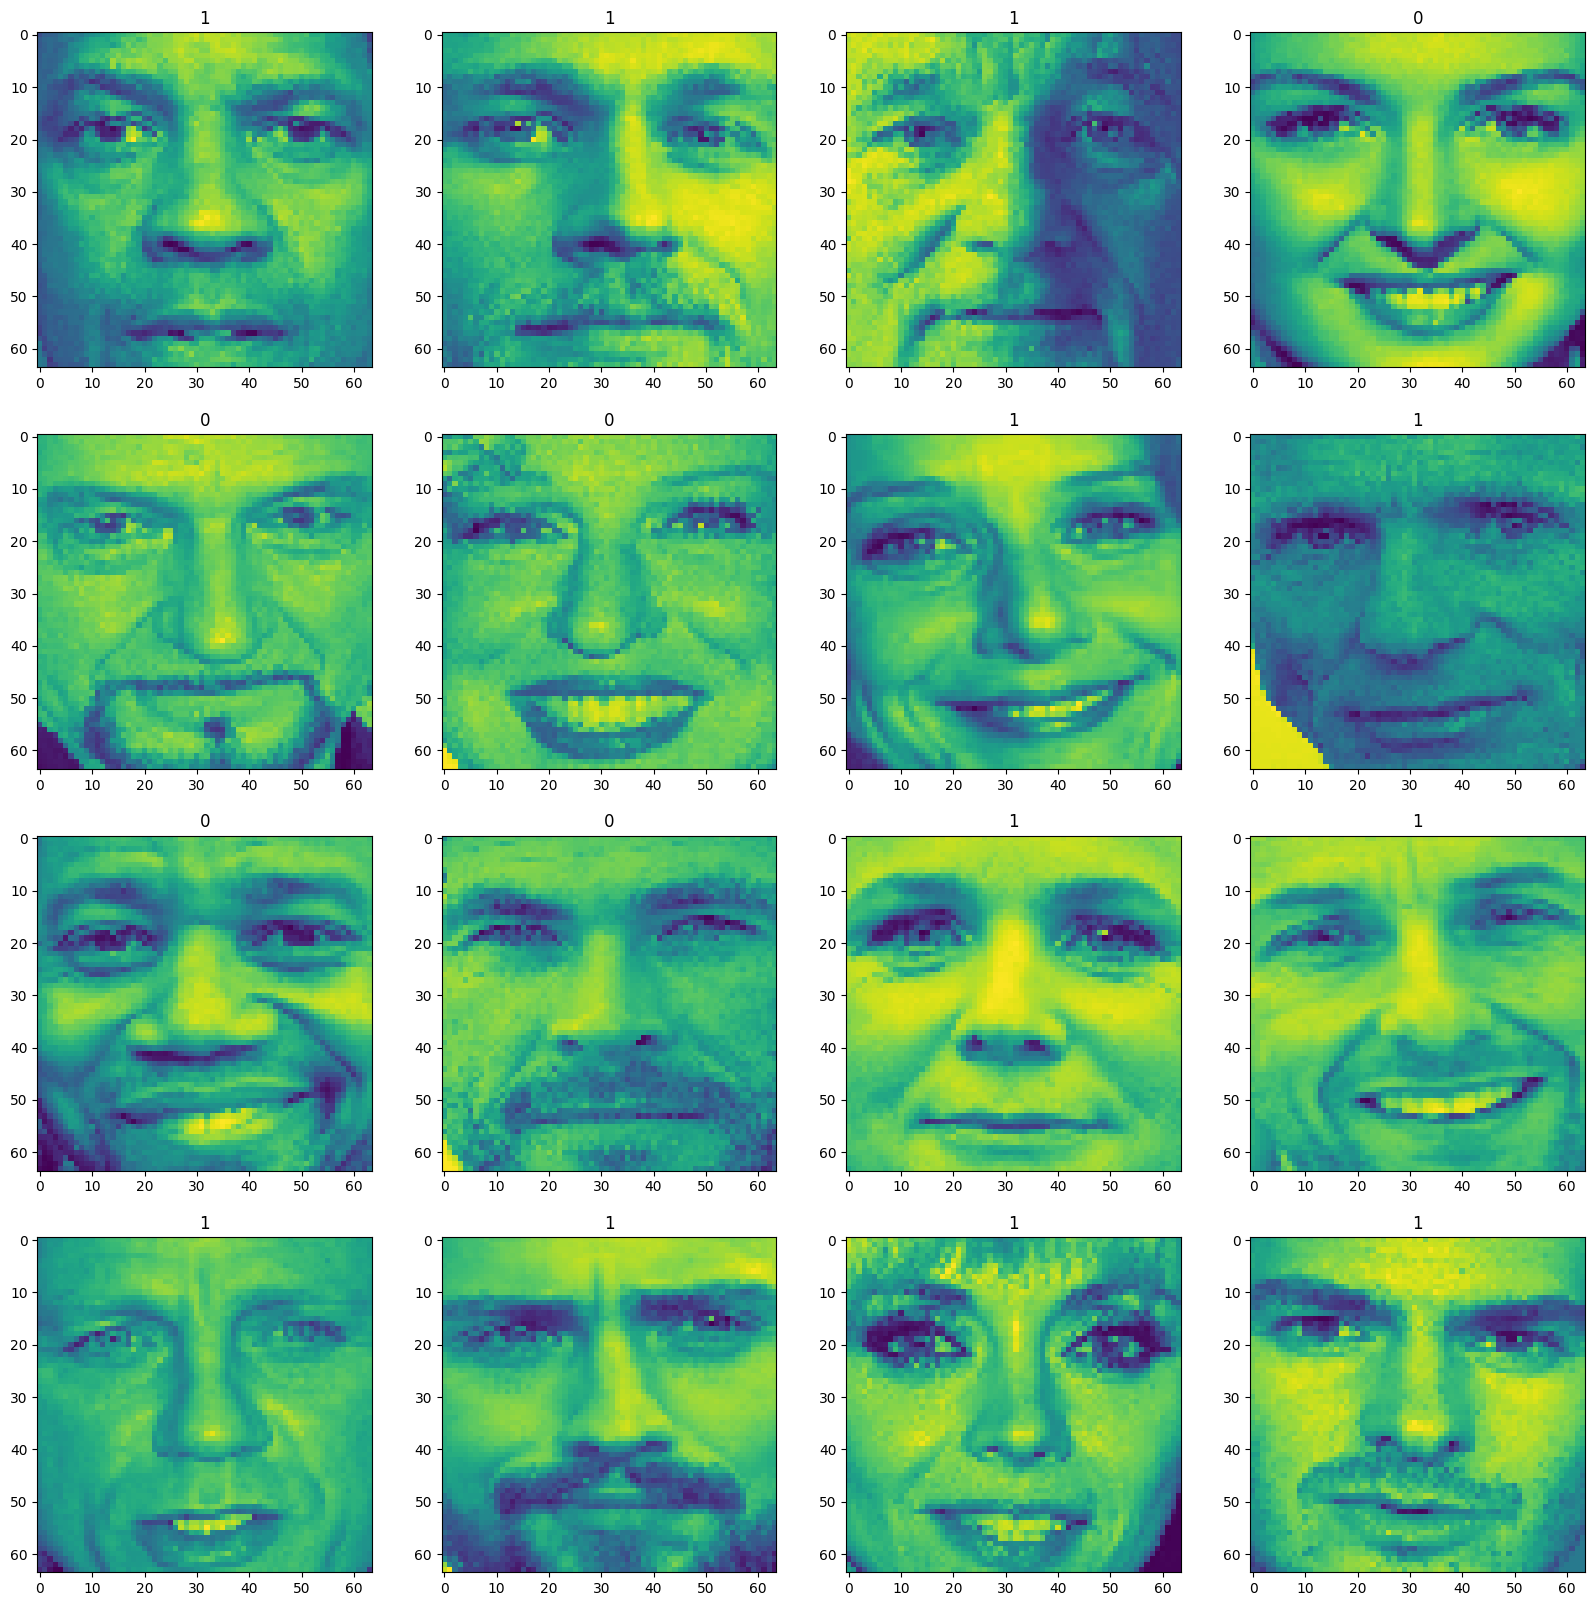

In [90]:
gen_dict = train_generator.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_generator)

plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 64
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'black' , fontsize= 12)
plt.show();

In [91]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Assuming 2 classes

In [92]:
model.compile(optimizer=keras.optimizers.Adam(), loss="categorical_crossentropy", metrics=['accuracy'])

In [110]:
model.fit(x = train_generator, validation_data = test_generator, epochs = 20)
model.save("face_recognition_model.h7")

Epoch 1/20
1/1 [==============================] - 43s 43s/step - loss: 0.4294 - accuracy: 0.8000 - val_loss: 0.5820 - val_accuracy: 0.7500
Epoch 2/20
1/1 [==============================] - 0s 480ms/step - loss: 0.5820 - accuracy: 0.7500 - val_loss: 0.3916 - val_accuracy: 0.8000
Epoch 3/20
1/1 [==============================] - 1s 555ms/step - loss: 0.3916 - accuracy: 0.8000 - val_loss: 0.4748 - val_accuracy: 0.9000
Epoch 4/20
1/1 [==============================] - 1s 547ms/step - loss: 0.4748 - accuracy: 0.9000 - val_loss: 0.4396 - val_accuracy: 0.9000
Epoch 5/20
1/1 [==============================] - 1s 617ms/step - loss: 0.4396 - accuracy: 0.9000 - val_loss: 0.3868 - val_accuracy: 0.9000
Epoch 6/20
1/1 [==============================] - 0s 399ms/step - loss: 0.3868 - accuracy: 0.9000 - val_loss: 0.3700 - val_accuracy: 0.8000
Epoch 7/20
1/1 [==============================] - 0s 372ms/step - loss: 0.3700 - accuracy: 0.8000 - val_loss: 0.3713 - val_accuracy: 0.8000
Epoch 8/20
1/1 [=====

In [111]:
def test_model(model, test_generator):
    # Make predictions on test data
    predictions = model.predict(test_generator)

    # Convert predictions to class labels (0 or 1)
    predicted_classes = np.argmax(predictions, axis=1)

    # Get true labels from the generator
    true_classes = test_generator.classes

    # Calculate accuracy
    accuracy = accuracy_score(true_classes, predicted_classes)

    return accuracy

# Test the model
test_accuracy = test_model(model, test_generator)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 235ms/step
Test Accuracy: 0.65


In [112]:
from keras.models import load_model
import numpy as np

# تحميل النموذج
model = load_model("face_recognition_model.h7")

# تحميل البيانات الاختبارية
# قم بتحميل الصور وتحويلها إلى الحجم المناسب وتقسيمها إلى دفعات (X_test) وتحميل التسميات المقابلة (y_test)

# تقييم النموذج
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1/1 [==============================] - 0s 337ms/step - loss: 0.1357 - accuracy: 0.9500
Test Loss: 0.13568976521492004
Test Accuracy: 0.949999988079071


In [116]:
def predict_image_with_threshold(model, img_path, threshold=0.5):
    # Load the image
    img = image.load_img(img_path, target_size=(64, 64), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image

    # Make prediction
    prediction = model.predict(img_array)

    # Convert probabilities to binary labels
    if prediction[0][1] > threshold:
        predicted_label = 1  # موجود  1
    else:
        predicted_label = 0  # مش موجود  0

    return predicted_label

# Example usage
img_path = "/content/drive/MyDrive/CNN_Data/Face Recognition/test/0/face_detected_5e21284c.jpg"
predicted_label = predict_image_with_threshold(model, img_path)
print("Predicted Label:", predicted_label)

1/1 [==============================] - 0s 69ms/step
Predicted Label: 0


In [118]:
img_path = "/content/drive/MyDrive/CNN_Data/Face Recognition/test/1/face_detected_31e97785.jpg"
predicted_label = predict_image_with_threshold(model, img_path)
print("Predicted Label:", predicted_label)

1/1 [==============================] - 0s 33ms/step
Predicted Label: 1
